In [1]:
#Functions for Corpora and Topic models
import gensim
import gensim.corpora as corpora
import os
seed = 61

In [2]:
#Load corpora and dictionary still containing verbs
corpus_train = corpora.MmCorpus(os.path.join("results", "corpus_train"))
corpus_test = corpora.MmCorpus(os.path.join("results", "corpus_test"))
id2word_train = corpora.Dictionary.load(os.path.join("results", "id2word_train"))

In [3]:
#Deciding on number of topics: Approach 1: HDP
from pprint import pprint
alphas=[0.0625,0.125,0.25,0.5,1.0,2.0]
n_topics = []
for alpha in alphas:
    print("alpha=", str(alpha))
    hdp_model = gensim.models.hdpmodel.HdpModel(corpus=corpus_train,
                                           id2word = id2word_train,
                                           alpha=alpha,
                                           random_state=seed)
    n_topics.append(hdp_model.get_topics().shape[0])
    pprint(hdp_model.print_topics())
    print("-----------------------------------------------------------------------")
print("n_topics: ", str(n_topics))

alpha= 0.0625
[(0,
  '0.010*baby + 0.008*time + 0.008*never + 0.008*cause + 0.008*let + 0.007*go '
  '+ 0.007*say + 0.007*want + 0.007*come + 0.007*way'),
 (1,
  '0.009*never + 0.006*baby + 0.006*cause + 0.006*back + 0.006*go + 0.005*time '
  '+ 0.005*say + 0.005*girl + 0.005*make + 0.005*want'),
 (2,
  '0.010*baby + 0.005*go + 0.004*girl + 0.004*wanna + 0.003*cause + 0.003*tell '
  '+ 0.003*say + 0.003*let + 0.003*could + 0.003*run'),
 (3,
  '0.006*baby + 0.006*come + 0.005*back + 0.005*never + 0.005*girl + 0.003*say '
  '+ 0.003*tell + 0.003*body + 0.003*thing + 0.003*wanna'),
 (4,
  '0.003*put + 0.003*take_care + 0.003*go + 0.002*us + 0.002*never + '
  '0.002*want + 0.002*baby + 0.002*ice + 0.002*life + 0.002*cause'),
 (5,
  '0.003*need + 0.003*time + 0.003*cause + 0.003*way + 0.003*weeping + '
  '0.002*back + 0.002*day + 0.002*never + 0.002*used + 0.002*say'),
 (6,
  '0.003*bitch + 0.003*back + 0.003*make + 0.002*niggas + 0.002*god + '
  '0.002*bad + 0.002*cause + 0.002*hey + 0.002

Results:
- all said 150 topics, but thats a little hard to evaluate
- topics for alpha=2.0 kind of generic, but for 0.0625 a little random: Hard for me to say what some topics represent
- Gonna test different amount of topics for lda up to 150: [10,20,50,100,150]

In [4]:
#Functions for training lda models over different values of alpha and visualization+saving of a specific lda model
import pyLDAvis.gensim
import pickle 
import pyLDAvis

def train_lda_over_alpha(corpus_train,corpus_test,id2word,num_topics,alphas,seed):
    log_perplexities = []
    eta = 1.0 / num_topics
    for alpha in alphas:
        lda_model = gensim.models.LdaMulticore(corpus=corpus_train,
                                               id2word=id2word_train,
                                               num_topics=num_topics,
                                               alpha=alpha,
                                               eta=eta,
                                               iterations=1000,
                                               random_state=seed)
        log_perplexities.append(lda_model.log_perplexity(corpus_test))
        print("alpha=",str(alpha))
        pprint(lda_model.print_topics())
        print("--------------------------------------------------")
    print("log perplexities on test corpus over alpha", str(log_perplexities))


def save_model_and_ldavis(corpus,id2word,num_topics,alpha,seed,name=""):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics,
                                               alpha=alpha,
                                               eta=1.0/num_topics,
                                            iterations=1000,
                                           random_state=seed)
    if not name:
        name = str(num_topics)
    lda_model.save('./results/lda_'+name+'.model')
    # Visualize the topics
    pyLDAvis.enable_notebook()
    LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+name)
    # # this is a bit time consuming - make the if statement True
    # # if you want to execute visualization prep yourself
    if not os.path.exists(LDAvis_data_filepath):
        LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)
    else: 
        # load the pre-prepared pyLDAvis data from disk
        with open(LDAvis_data_filepath, 'rb') as f:
            LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
    return LDAvis_prepared

In [5]:
#LDA WITH 10 TOPICS
num_topics=10
train_lda_over_alpha(corpus_train,corpus_test,id2word_train,num_topics,alphas,seed)

alpha= 0.0625
[(0,
  '0.011*"let" + 0.010*"time" + 0.010*"still" + 0.010*"real" + 0.009*"heart" + '
  '0.009*"world" + 0.007*"around" + 0.007*"hey" + 0.007*"never" + '
  '0.007*"make"'),
 (1,
  '0.021*"baby" + 0.009*"time" + 0.008*"gonna" + 0.008*"say" + 0.008*"way" + '
  '0.008*"cause" + 0.007*"call" + 0.007*"feel" + 0.007*"night" + 0.007*"tell"'),
 (2,
  '0.019*"baby" + 0.015*"go" + 0.010*"never" + 0.010*"cause" + 0.010*"life" + '
  '0.009*"right" + 0.008*"man" + 0.008*"say" + 0.008*"take" + 0.008*"time"'),
 (3,
  '0.012*"way" + 0.012*"come" + 0.011*"wanna" + 0.010*"let" + 0.010*"never" + '
  '0.009*"baby" + 0.008*"feel" + 0.007*"man" + 0.007*"home" + 0.007*"cause"'),
 (4,
  '0.009*"heart" + 0.009*"go" + 0.008*"never" + 0.007*"way" + 0.007*"nigga" + '
  '0.007*"wanna" + 0.006*"come" + 0.006*"shit" + 0.006*"cause" + 0.006*"let"'),
 (5,
  '0.009*"make" + 0.009*"say" + 0.008*"man" + 0.008*"cause" + 0.007*"come" + '
  '0.007*"go" + 0.007*"let" + 0.007*"back" + 0.006*"feel" + 0.006*"em"')

Results:
- log perplexities very similar: but the better the lower alpha
- very similar topics, independent of alpha: most capture a love relation: say something/tell me, wanna come, back baby
- A bit more difference for lower alpha, so go with perplexity and take alpha=0.0625 in hope of biggest descriptive power
- Note: this is probably not the model we pick: hdp gave better results

In [6]:
#VISUALIZATION OF CHOSEN LDA WITH 10 TOPICS
LDAvis = save_model_and_ldavis(corpus_train,id2word_train,num_topics,alpha=0.0625,seed=seed)
LDAvis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.001495  0.008731       1        1  20.546906
4      0.002583  0.030391       2        1  13.270394
3      0.003965  0.008997       3        1  11.088918
7      0.001356  0.028671       4        1  10.580235
2      0.000859  0.015369       5        1  10.022631
8      0.006942  0.005787       6        1   8.786817
1      0.006045  0.010843       7        1   8.502435
5      0.005203  0.011596       8        1   8.324333
9      0.061112 -0.072730       9        1   4.553823
0     -0.086570 -0.047654      10        1   4.323508, topic_info=      Term         Freq        Total Category  logprob  loglift
188    let  1849.000000  1849.000000  Default  30.0000  30.0000
47    baby  2413.000000  2413.000000  Default  29.0000  29.0000
204   real   663.000000   663.000000  Default  28.0000  28.0000
190   life  1285.000000  1285.000000  Default  27.0000  27.0000
478  gonna  1157.000000  1157.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
198   need    46.750548  1272.552912  Topic10  -5.4359  -0.1629
48    back    48.988069  1682.974180  Topic10  -5.3892  -0.3956
47    baby    50.231809  2413.813035  Topic10  -5.3641  -0.7312
96    good    43.850099  1050.204521  Topic10  -5.5000  -0.0349
173   girl    43.924698  1323.307868  Topic10  -5.4983  -0.2643

[791 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2251      1  0.165847  ache
2251      2  0.110565  ache
2251      3  0.110565  ache
2251      5  0.055282  ache
2251      6  0.386976  ache
...     ...       ...   ...
941       6  0.024956  zone
941       7  0.049912  zone
941       8  0.074869  zone
941       9  0.049912  zone
941      10  0.024956  zone

[4173 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 4, 8, 3, 9, 2, 6, 10, 1])

Results:
- Very similar topics
- 9, 10 big outsiders: dont understand 10, 9 about thinking about life
- 2,4 outsiders: about going back to lover

In [7]:
#LDA WITH 20 TOPICS
num_topics=20
train_lda_over_alpha(corpus_train,corpus_test,id2word_train,num_topics,alphas,seed)

alpha= 0.0625
[(0,
  '0.019*"real" + 0.011*"heart" + 0.009*"light" + 0.009*"feel" + 0.008*"let" + '
  '0.008*"never" + 0.008*"deep" + 0.008*"time" + 0.007*"place" + '
  '0.007*"strong"'),
 (1,
  '0.013*"baby" + 0.010*"say" + 0.010*"cause" + 0.009*"tell" + 0.008*"gonna" + '
  '0.008*"night" + 0.007*"never" + 0.007*"back" + 0.007*"way" + 0.006*"turn"'),
 (2,
  '0.016*"baby" + 0.013*"right" + 0.013*"cause" + 0.010*"say" + 0.009*"take" + '
  '0.009*"go" + 0.009*"life" + 0.009*"time" + 0.009*"way" + 0.008*"never"'),
 (3,
  '0.015*"wanna" + 0.013*"way" + 0.010*"man" + 0.009*"home" + 0.008*"baby" + '
  '0.008*"let" + 0.008*"come" + 0.008*"us" + 0.007*"say" + 0.007*"said"'),
 (4,
  '0.011*"heart" + 0.010*"wanna" + 0.009*"go" + 0.009*"way" + 0.008*"nigga" + '
  '0.008*"never" + 0.007*"ride" + 0.007*"lost" + 0.007*"come" + 0.006*"say"'),
 (5,
  '0.013*"say" + 0.008*"back" + 0.007*"cause" + 0.007*"em" + 0.007*"better" + '
  '0.007*"man" + 0.007*"make" + 0.006*"come" + 0.006*"close" + 0.005*"never

Results:
- In general: very similar topics to using 10 topics
- alpha=2.0: Topics only baby never time basically
- For alpha = 0.065 to alpha = 0.5: Very similar topics: a bit more diversity
- lowest perplexity for lowest alpha -> take that

In [8]:
#VISUALIZATION OF CHOSEN LDA WITH 20 TOPICS
alpha=0.0625
LDAvis = save_model_and_ldavis(corpus_train,id2word_train,num_topics,alpha=alpha,seed=seed)
LDAvis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.000981  0.007563       1        1  12.088007
6     -0.005439  0.010487       2        1  10.155925
18    -0.006908  0.007649       3        1   9.202596
10    -0.009249  0.010078       4        1   6.323271
17     0.001858 -0.001409       5        1   5.811603
7     -0.015065  0.019772       6        1   5.529403
14    -0.008798  0.018610       7        1   5.419915
4     -0.007812  0.011020       8        1   5.258056
3      0.003493  0.001811       9        1   5.200827
19    -0.012966  0.020792      10        1   4.366641
1     -0.012353 -0.012509      11        1   4.210810
2     -0.016164  0.026522      12        1   4.083401
5     -0.007095  0.000413      13        1   3.742560
11    -0.000704 -0.002134      14        1   3.660953
8     -0.001991 -0.002325      15        1   3.598717
12    -0.020978  0.047674      16        1   2.772218
16    -0.049751  0.027584      17        1   2.479740
15     0.005817 -0.095550      18        1   2.387569
9     -0.005467 -0.117058      19        1   2.101453
0      0.170553  0.021010      20        1   1.606334, topic_info=       Term         Freq        Total Category  logprob  loglift
47     baby  2443.000000  2443.000000  Default  30.0000  30.0000
204    real   664.000000   664.000000  Default  29.0000  29.0000
33    night   945.000000   945.000000  Default  28.0000  28.0000
188     let  1834.000000  1834.000000  Default  27.0000  27.0000
71     time  1971.000000  1971.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
13    could    22.252216  1159.636786  Topic20  -5.1882   0.1778
48     back    22.268923  1693.102513  Topic20  -5.1874  -0.1999
49   better    19.435883   700.770007  Topic20  -5.3235   0.5462
198    need    20.172212  1277.359315  Topic20  -5.2863  -0.0170
128    take    19.651439  1283.686627  Topic20  -5.3125  -0.0481

[1446 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2867      1  0.139420  acid
2867      2  0.092947  acid
2867      6  0.232367  acid
2867      7  0.046473  acid
2867      9  0.046473  acid
...     ...       ...   ...
2419     10  0.041233  zero
2419     11  0.041233  zero
2419     14  0.041233  zero
2419     15  0.123698  zero
2419     16  0.082465  zero

[11223 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 7, 19, 11, 18, 8, 15, 5, 4, 20, 2, 3, 6, 12, 9, 13, 17, 16, 10, 1])

Results:
- Again very big cluster of topics of generic love phrases
- But within this cluster, there is some diversity still
- topic 17: about thinking about girl at night
- topic 20: about strong connection
- topic 18: About wanting someone back
- topic 19: Not about love but thinking about life

In [9]:
#LDA WITH 50 TOPICS
num_topics=50
train_lda_over_alpha(corpus_train,corpus_test,id2word_train,num_topics,alphas,seed)

alpha= 0.0625
[(40,
  '0.027*"na_na" + 0.017*"time" + 0.014*"cause" + 0.013*"never" + 0.011*"way" '
  '+ 0.009*"let" + 0.008*"heart" + 0.007*"fake" + 0.007*"go" + 0.007*"around"'),
 (20,
  '0.024*"even" + 0.018*"let" + 0.013*"baby" + 0.011*"time" + 0.010*"feel" + '
  '0.010*"hold" + 0.010*"babe" + 0.009*"gon" + 0.008*"girl" + 0.007*"want"'),
 (17,
  '0.024*"never" + 0.014*"say" + 0.012*"time" + 0.009*"man" + 0.009*"tell" + '
  '0.009*"baby" + 0.008*"need" + 0.008*"dark" + 0.008*"life" + 0.008*"make"'),
 (14,
  '0.011*"nigga" + 0.011*"never" + 0.010*"keep" + 0.010*"go" + 0.010*"way" + '
  '0.010*"make" + 0.010*"niggas" + 0.008*"bitch" + 0.008*"baby" + '
  '0.008*"cause"'),
 (22,
  '0.033*"go" + 0.014*"gotta" + 0.013*"baby" + 0.010*"cause" + 0.009*"heart" + '
  '0.008*"take" + 0.007*"much" + 0.007*"girl" + 0.006*"long" + 0.006*"make"'),
 (36,
  '0.020*"shit" + 0.012*"good" + 0.012*"fuck" + 0.010*"feel" + 0.010*"em" + '
  '0.010*"night" + 0.008*"baby" + 0.008*"old" + 0.008*"bitch" + 0.007

Results:
- log perplexities again lowest for alpha = 0.0625
- starting to see real differences for different values of alpha
- alpha=1.0 and alpha=2.0 very generic again
- alpha = 0.00625 and 0.125 very similar, 0.125 seems a bit more interpretable
- Remark: now topics start to get sorted (by probability): show only top 20

In [10]:
#VISUALIZATION OF CHOSEN LDA WITH 50 TOPICS
alpha=0.125
LDAvis = save_model_and_ldavis(corpus_train,id2word_train,num_topics,alpha=alpha,seed=seed)
LDAvis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13     0.019739 -0.009619       1        1  6.961878
6      0.003476  0.002300       2        1  5.481856
18     0.001804  0.019449       3        1  5.386934
27    -0.014790  0.003642       4        1  3.560068
10     0.004415  0.008914       5        1  3.529809
7      0.044418 -0.014605       6        1  3.471566
35    -0.014828 -0.004693       7        1  3.403755
14     0.033720 -0.002600       8        1  2.831303
17    -0.019363 -0.000001       9        1  2.814037
21     0.012981 -0.016552      10        1  2.752691
38     0.043470 -0.021345      11        1  2.552013
3     -0.004663 -0.013813      12        1  2.520217
4      0.024803 -0.020384      13        1  2.481686
5     -0.004488 -0.019980      14        1  2.286823
36     0.054419 -0.015180      15        1  2.216579
34     0.001160 -0.029343      16        1  2.216285
19     0.018254  0.005051      17        1  2.135877
2      0.007703 -0.003145      18        1  2.029359
29    -0.001957  0.005132      19        1  2.019749
11     0.014818 -0.012540      20        1  2.018855
48    -0.030748 -0.002061      21        1  1.985800
46    -0.023114  0.001137      22        1  1.828733
25    -0.009229 -0.001167      23        1  1.786646
8     -0.047088  0.000089      24        1  1.723144
26     0.003370 -0.015554      25        1  1.696049
12     0.018671  0.009634      26        1  1.595009
1     -0.017187  0.011954      27        1  1.573945
16     0.006029  0.048404      28        1  1.503611
42     0.015646 -0.031042      29        1  1.474160
28    -0.076279  0.063063      30        1  1.439733
23    -0.023324 -0.007065      31        1  1.415709
40    -0.013760 -0.009856      32        1  1.395412
44    -0.027474  0.003866      33        1  1.321076
45     0.008099 -0.048738      34        1  1.299111
41     0.025457 -0.030275      35        1  1.290725
43    -0.049012  0.035189      36        1  1.237516
15    -0.094325  0.064304      37        1  1.208701
20     0.060955  0.035377      38        1  1.180972
39    -0.059840  0.064675      39        1  1.135301
22     0.015470 -0.007554      40        1  1.052013
30     0.020918  0.028890      41        1  1.000925
0     -0.061691 -0.043134      42        1  0.954786
24    -0.007946  0.022717      43        1  0.946579
32    -0.026823 -0.054980      44        1  0.919260
33     0.098900  0.022794      45        1  0.905956
37    -0.002199  0.127782      46        1  0.896366
47     0.026203  0.071884      47        1  0.752927
49    -0.071492 -0.174599      48        1  0.724271
9     -0.050302 -0.026668      49        1  0.571380
31     0.167028 -0.019754      50        1  0.512845, topic_info=     Term         Freq        Total Category  logprob  loglift
47   baby  2448.000000  2448.000000  Default  30.0000  30.0000
71   time  1990.000000  1990.000000  Default  29.0000  29.0000
173  girl  1321.000000  1321.000000  Default  28.0000  28.0000
283    go  1851.000000  1851.000000  Default  27.0000  27.0000
11   come  1553.000000  1553.000000  Default  26.0000  26.0000
..    ...          ...          ...      ...      ...      ...
403  long     6.661490   668.131482  Topic50  -5.2526   0.6648
48   back     7.458680  1676.350341  Topic50  -5.1395  -0.1420
71   time     7.457507  1990.243310  Topic50  -5.1397  -0.3138
190  life     6.744634  1256.152310  Topic50  -5.2401   0.0459
91   feel     6.212455  1406.370418  Topic50  -5.3223  -0.1493

[3381 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1334      1  0.047239  able
1334      2  0.023619  able
1334      3  0.023619  able
1334      4  0.047239  able
1334      7  0.023619  able
...     ...       ...   ...
941      29  0.024513  zone
941      40  0.024513  zone
941      44  0.024513  zone
941      45  0.024513  zone
941      49  0.024513  zone

[36110 rows x 3 columns], R=30, lambda_ste

Results:
- Now get different topics and not one big cluster: but the single topics are less relevant (TODO find out relevance metric)
- bottom left quadrant not about love and more about life: world and this generation, feeling shitty
- right side seems to be a different genre when looking at language

In [11]:
#LDA WITH 100 TOPICS
num_topics=100
train_lda_over_alpha(corpus_train,corpus_test,id2word_train,num_topics,alphas,seed)

alpha= 0.0625
[(34,
  '0.016*"go" + 0.016*"us" + 0.016*"let" + 0.015*"come" + 0.013*"home" + '
  '0.012*"man" + 0.009*"never" + 0.008*"world" + 0.008*"life" + 0.008*"free"'),
 (22,
  '0.075*"go" + 0.034*"gotta" + 0.020*"scared" + 0.015*"take" + 0.015*"cause" '
  '+ 0.015*"heart" + 0.010*"man" + 0.010*"touch" + 0.010*"way" + 0.010*"mind"'),
 (6,
  '0.022*"say" + 0.017*"time" + 0.015*"never" + 0.015*"girl" + 0.011*"want" + '
  '0.010*"keep" + 0.009*"back" + 0.009*"cause" + 0.009*"baby" + 0.009*"take"'),
 (74,
  '0.023*"feel" + 0.018*"time" + 0.017*"baby" + 0.016*"go" + 0.012*"take" + '
  '0.011*"never" + 0.010*"say" + 0.010*"shake" + 0.009*"da_da" + '
  '0.009*"right"'),
 (71,
  '0.024*"want" + 0.018*"go" + 0.012*"baby" + 0.011*"tell" + 0.010*"way" + '
  '0.010*"cause" + 0.010*"never" + 0.009*"think" + 0.009*"right" + '
  '0.009*"could"'),
 (10,
  '0.013*"time" + 0.012*"gone" + 0.011*"still" + 0.010*"good" + 0.009*"could" '
  '+ 0.009*"need" + 0.009*"gonna" + 0.007*"never" + 0.007*"make"

Results:
- lowest perplexity again for alpha = 0.0625
- For me seems like topics got more generic in comparison to 50 topics, but maybe due to relevance metric (probability).
    - Have seen before: That most relevant topics are those in the cluster, maybe taking top 20 of more topics will just lead to this impression
- alpha 0.0125 again seemd best interpretable

In [12]:
#VISUALIZATION OF CHOSEN LDA WITH 100 TOPICS
alpha=0.125
LDAvis = save_model_and_ldavis(corpus_train,id2word_train,num_topics,alpha=alpha,seed=seed)
LDAvis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
13     0.058103  0.004891       1        1  3.677448
88     0.081004 -0.010450       2        1  2.803120
6      0.002168 -0.011248       3        1  2.269924
18    -0.031608 -0.027199       4        1  2.174124
89     0.035186 -0.011124       5        1  2.023261
...         ...       ...     ...      ...       ...
91    -0.029239  0.096308      96        1  0.414854
31     0.002213 -0.041863      97        1  0.414232
81     0.090494  0.123454      98        1  0.395196
49     0.056350  0.082565      99        1  0.386949
47    -0.010329  0.115358     100        1  0.241427

[100 rows x 5 columns], topic_info=         Term         Freq        Total  Category  logprob  loglift
47       baby  2387.000000  2387.000000   Default  30.0000  30.0000
71       time  2006.000000  2006.000000   Default  29.0000  29.0000
283        go  1888.000000  1888.000000   Default  28.0000  28.0000
1236    na_na   199.000000   199.000000   Default  27.0000  27.0000
462       say  1789.000000  1789.000000   Default  26.0000  26.0000
...       ...          ...          ...       ...      ...      ...
23    getting     4.006039   284.578571  Topic100  -5.0077   1.7632
337      said     4.543287   967.759173  Topic100  -4.8818   0.6650
369      well     4.494479   871.534162  Topic100  -4.8926   0.7590
47       baby     4.434312  2387.754386  Topic100  -4.9061  -0.2624
192     might     4.006293   699.685603  Topic100  -5.0076   0.8636

[6444 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1334      1  0.049350  able
1334      2  0.049350  able
1334      3  0.024675  able
1334      4  0.024675  able
1334      5  0.024675  able
...     ...       ...   ...
2419     50  0.044140  zero
2419     53  0.044140  zero
2419     67  0.044140  zero
2419     69  0.088280  zero
2419     77  0.044140  zero

[68377 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 89, 7, 19, 90, 60, 65, 28, 52, 4, 81, 11, 15, 58, 77, 79, 18, 20, 72, 22, 91, 5, 51, 8, 36, 39, 66, 78, 74, 67, 63, 93, 56, 68, 37, 64, 55, 47, 6, 3, 26, 83, 53, 99, 12, 76, 9, 96, 59, 62, 49, 46, 35, 94, 100, 61, 17, 43, 30, 69, 98, 80, 71, 97, 87, 86, 75, 2, 27, 24, 44, 42, 57, 41, 70, 85, 54, 31, 21, 95, 88, 1, 40, 33, 84, 45, 29, 25, 13, 38, 23, 16, 10, 34, 73, 92, 32, 82, 50, 48])

Results:
- even more distributed topics
- bottom left quadrant: needing girl, never let go
- bottom right seems more hip hop dominated from the use of language

In [13]:
#LDA WITH 150 TOPICS
num_topics=150
train_lda_over_alpha(corpus_train,corpus_test,id2word_train,num_topics,alphas,seed)

alpha= 0.0625
[(101,
  '0.021*"say" + 0.021*"better" + 0.018*"tell" + 0.013*"want" + 0.012*"baby" + '
  '0.010*"could" + 0.010*"right" + 0.009*"lose" + 0.009*"need" + 0.008*"let"'),
 (56,
  '0.044*"right" + 0.022*"away" + 0.021*"give" + 0.020*"come" + 0.018*"let" + '
  '0.015*"tonight" + 0.012*"world" + 0.012*"need" + 0.011*"coming" + '
  '0.009*"light"'),
 (8,
  '0.016*"cause" + 0.012*"look" + 0.012*"make" + 0.011*"human" + 0.010*"tell" '
  '+ 0.010*"day" + 0.010*"never" + 0.010*"time" + 0.009*"whiskey" + '
  '0.009*"life"'),
 (7,
  '0.024*"back" + 0.013*"go" + 0.009*"yo" + 0.009*"nigga" + 0.007*"blood" + '
  '0.007*"heart" + 0.007*"night" + 0.007*"bitch" + 0.007*"fuck" + '
  '0.006*"keep"'),
 (17,
  '0.022*"never" + 0.016*"time" + 0.012*"gonna" + 0.011*"say" + 0.009*"tell" + '
  '0.009*"wanna" + 0.009*"go" + 0.009*"dark" + 0.009*"cause" + 0.008*"take"'),
 (98,
  '0.013*"cause" + 0.012*"never" + 0.012*"gonna" + 0.011*"girl" + '
  '0.010*"somebody" + 0.009*"always" + 0.009*"wanna" + 0.

Results:
- Again lowest perplexity for alpha = 0.0625 but not much difference to 0.125
- For alpha=1.0/2.0 again kinda generic
- Also similar for alpha=0.0625/0.125 but much more diversity in the topics
- Not more generic topics than for num_topics=100, not a trend. If anything more diversity
- Since no observed difference, take alpha=0.0625 cause lower log perplexity

In [14]:
#VISUALIZATION OF CHOSEN LDA WITH 150 TOPICS
alpha=0.0625
LDAvis = save_model_and_ldavis(corpus_train,id2word_train,num_topics,alpha=alpha,seed=seed)
LDAvis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
136    0.068765  0.016970       1        1  2.373311
13     0.052804 -0.000454       2        1  2.042697
59    -0.030607 -0.034768       3        1  1.627319
6      0.025599 -0.019266       4        1  1.596379
113    0.015912 -0.015841       5        1  1.486348
...         ...       ...     ...      ...       ...
49    -0.063130  0.111690     146        1  0.195249
30    -0.066072  0.229967     147        1  0.191004
24    -0.038457  0.070291     148        1  0.177749
37    -0.229667  0.136013     149        1  0.170136
112   -0.010391  0.134438     150        1  0.167621

[150 rows x 5 columns], topic_info=       Term         Freq        Total  Category  logprob  loglift
47     baby  2446.000000  2446.000000   Default  30.0000  30.0000
71     time  2011.000000  2011.000000   Default  29.0000  29.0000
1236  na_na   222.000000   222.000000   Default  28.0000  28.0000
462     say  1811.000000  1811.000000   Default  27.0000  27.0000
11     come  1568.000000  1568.000000   Default  26.0000  26.0000
...     ...          ...          ...       ...      ...      ...
186    keys     2.174772    63.861494  Topic150  -5.2537   3.0114
81    cause     3.298952  1924.074255  Topic150  -4.8370   0.0226
277    fuck     2.905274   834.739234  Topic150  -4.9641   0.7306
138     way     3.031223  1614.168067  Topic150  -4.9217   0.1136
33    night     2.561923   937.627622  Topic150  -5.0899   0.4886

[9443 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1334      2  0.022132  able
1334      7  0.044264  able
1334      8  0.022132  able
1334      9  0.022132  able
1334     11  0.022132  able
...     ...       ...   ...
941      80  0.024968  zone
941      95  0.024968  zone
941      97  0.024968  zone
941     125  0.024968  zone
941     140  0.024968  zone

[87444 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[137, 14, 60, 7, 114, 116, 89, 19, 102, 127, 15, 78, 4, 58, 148, 90, 22, 65, 77, 140, 66, 115, 37, 51, 8, 28, 68, 74, 72, 109, 79, 36, 91, 125, 20, 5, 131, 52, 64, 47, 53, 144, 101, 39, 105, 18, 94, 108, 81, 107, 3, 141, 35, 49, 55, 99, 67, 75, 139, 59, 106, 63, 57, 134, 11, 97, 130, 85, 6, 27, 62, 56, 93, 86, 46, 122, 44, 100, 30, 119, 96, 124, 26, 80, 132, 135, 43, 61, 41, 126, 123, 69, 110, 121, 84, 104, 87, 12, 118, 76, 9, 23, 150, 83, 117, 2, 120, 71, 111, 143, 138, 129, 98, 92, 146, 142, 13, 42, 133, 103, 24, 1, 112, 95, 21, 136, 40, 54, 88, 82, 70, 128, 145, 33, 17, 34, 147, 29, 48, 10, 149, 73, 16, 45, 32, 50, 31, 25, 38, 113])

Results:
- Topics seem more clustered again
- But topics within the cluster seem divers: Not just about love, but drinking (101), dream/american dream (80), fight/win (89), ...
- Less interpretable in terms of spatial distance between clusters in comparison to 100 topics
- So which one do I use?

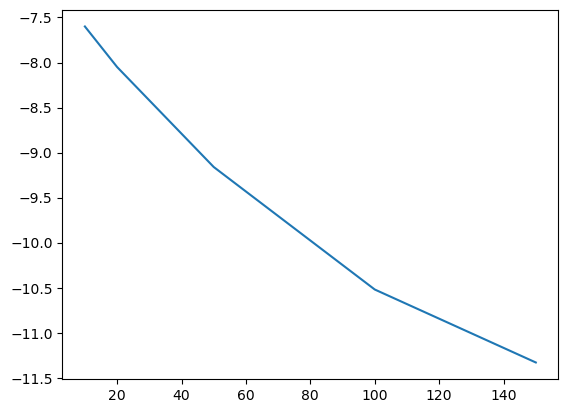

In [15]:
#Maybe look at log perplexity over n_topics
import matplotlib.pyplot as plt
n_teachers = [10,20,50,100,150]
log_perplexities=[-7.60,-8.05,-9.16,-10.52,-11.33]

plt.plot(n_teachers,log_perplexities)
plt.show()

Results:
- Maybe see little elbow at 100 topics
- as perplexity seems to decrease constantly lowest not best choice
- Additionally with more distributed topics for 100 that are also interpretable, decide for 100!